In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Load COVID-19 Confirmed Cases Dataset

In [3]:
confirmed_df = pd.read_csv('D:\\Tutedude\\DS-Assignments\\Assignment 7 - COVID-19 DATA ANALYSIS PROJECT\\covid19-analysis-project\\Dataset\\covid19_Confirmed_dataset.csv')
confirmed_df.drop(['Lat', 'Long'], axis=1, inplace=True)
confirmed_df = confirmed_df.groupby("Country/Region").sum()
confirmed_df.head()


,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Compute Maximum Infection Rate per Country

In [5]:
# Drop non-numeric columns before calculating diff
confirmed_numeric = confirmed_df.drop(columns=["Province/State"], errors="ignore")

max_infection_rate = []
for country in confirmed_numeric.index:
    max_infection_rate.append(confirmed_numeric.loc[country].diff().max())

confirmed_df["max_infected_rate"] = max_infection_rate
corona_data = pd.DataFrame(confirmed_df["max_infected_rate"])
corona_data.head()


,max_infected_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Load and Prepare Happiness Report Dataset

In [ ]:
happiness_report = pd.read_csv('D:\\Tutedude\\DS-Assignments\\Assignment 7 - COVID-19 DATA ANALYSIS PROJECT\\covid19-analysis-project\\Dataset\\worldwide_happiness_report.csv')
happiness_report.drop(["Overall rank", "Score", "Generosity", "Perceptions of corruption"], axis=1, inplace=True)
happiness_report.set_index("Country or region", inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## Merge Infection Data with Happiness Data

In [7]:
merged_data = corona_data.join(happiness_report, how="inner")
merged_data.head()

,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


## Correlation Analysis

In [8]:
merged_data.corr()

,max_infected_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infected_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


## Visualizations

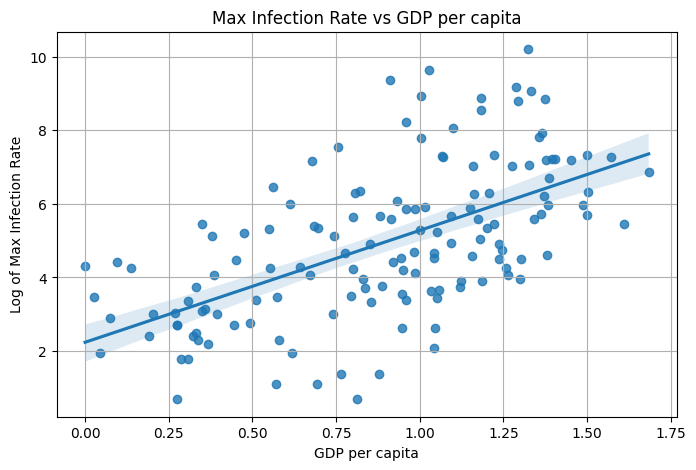

In [9]:
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_data["GDP per capita"], y=np.log1p(merged_data["max_infected_rate"]))
plt.title("Max Infection Rate vs GDP per capita")
plt.xlabel("GDP per capita")
plt.ylabel("Log of Max Infection Rate")
plt.grid(True)
plt.show()


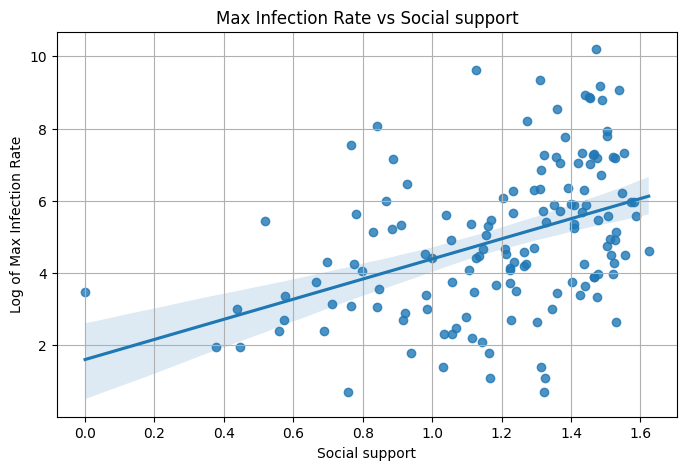

In [10]:
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_data["Social support"], y=np.log1p(merged_data["max_infected_rate"]))
plt.title("Max Infection Rate vs Social support")
plt.xlabel("Social support")
plt.ylabel("Log of Max Infection Rate")
plt.grid(True)
plt.show()


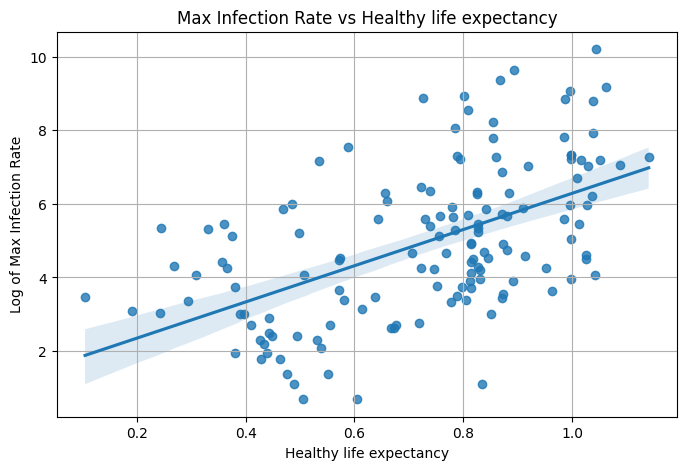

In [11]:
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_data["Healthy life expectancy"], y=np.log1p(merged_data["max_infected_rate"]))
plt.title("Max Infection Rate vs Healthy life expectancy")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Log of Max Infection Rate")
plt.grid(True)
plt.show()


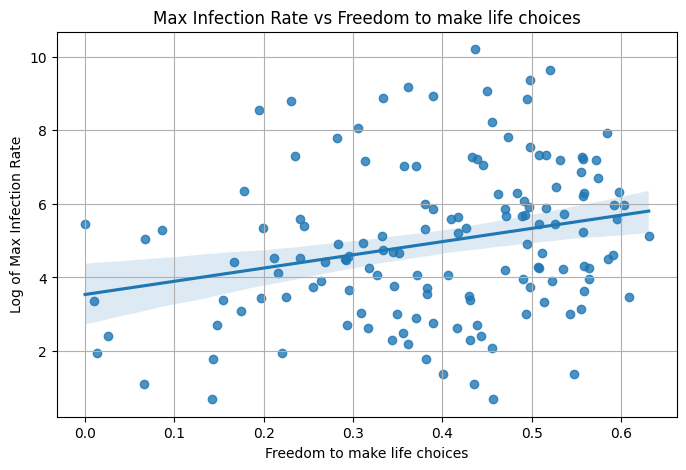

In [12]:
plt.figure(figsize=(8, 5))
sns.regplot(x=merged_data["Freedom to make life choices"], y=np.log1p(merged_data["max_infected_rate"]))
plt.title("Max Infection Rate vs Freedom to make life choices")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Log of Max Infection Rate")
plt.grid(True)
plt.show()


## Load and Process COVID-19 Deaths Dataset

In [14]:
deaths_df = pd.read_csv('D:\\Tutedude\\DS-Assignments\\Assignment 7 - COVID-19 DATA ANALYSIS PROJECT\\covid19-analysis-project\\Dataset\\covid19_deaths_dataset.csv')
deaths_df.drop(['Lat', 'Long'], axis=1, inplace=True)
deaths_df = deaths_df.groupby("Country/Region").sum()

# Drop non-numeric columns before calculating diff
deaths_numeric = deaths_df.drop(columns=["Province/State"], errors="ignore")

# Compute max death rate
max_death_rate = []
for country in deaths_numeric.index:
    max_death_rate.append(deaths_numeric.loc[country].diff().max())

deaths_df["max_death_rate"] = max_death_rate
death_data = pd.DataFrame(deaths_df["max_death_rate"])


## Merge Death Rate with Happiness Metrics

In [15]:
death_merged = death_data.join(happiness_report, how="inner")
death_merged.head()


,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


## Visualizations

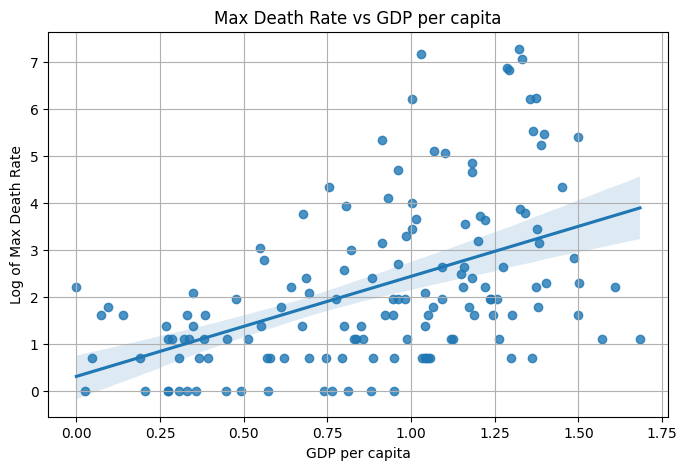

In [16]:
plt.figure(figsize=(8, 5))
sns.regplot(x=death_merged["GDP per capita"], y=np.log1p(death_merged["max_death_rate"]))
plt.title("Max Death Rate vs GDP per capita")
plt.xlabel("GDP per capita")
plt.ylabel("Log of Max Death Rate")
plt.grid(True)
plt.show()


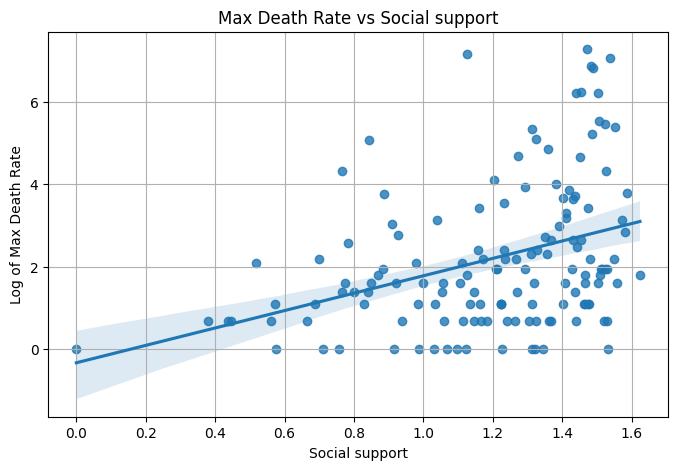

In [17]:
plt.figure(figsize=(8, 5))
sns.regplot(x=death_merged["Social support"], y=np.log1p(death_merged["max_death_rate"]))
plt.title("Max Death Rate vs Social support")
plt.xlabel("Social support")
plt.ylabel("Log of Max Death Rate")
plt.grid(True)
plt.show()


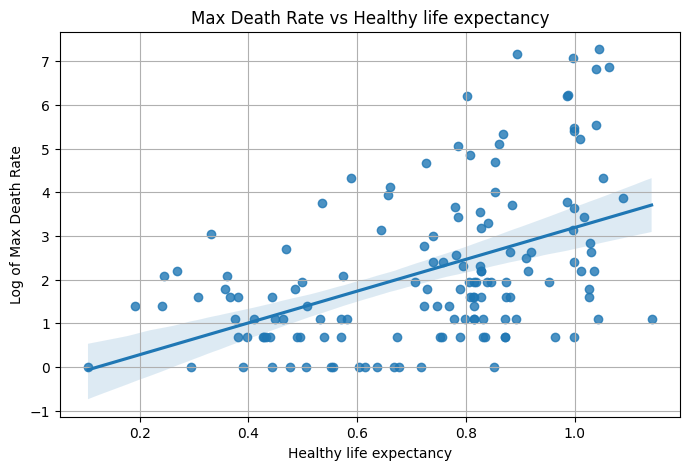

In [18]:
plt.figure(figsize=(8, 5))
sns.regplot(x=death_merged["Healthy life expectancy"], y=np.log1p(death_merged["max_death_rate"]))
plt.title("Max Death Rate vs Healthy life expectancy")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Log of Max Death Rate")
plt.grid(True)
plt.show()


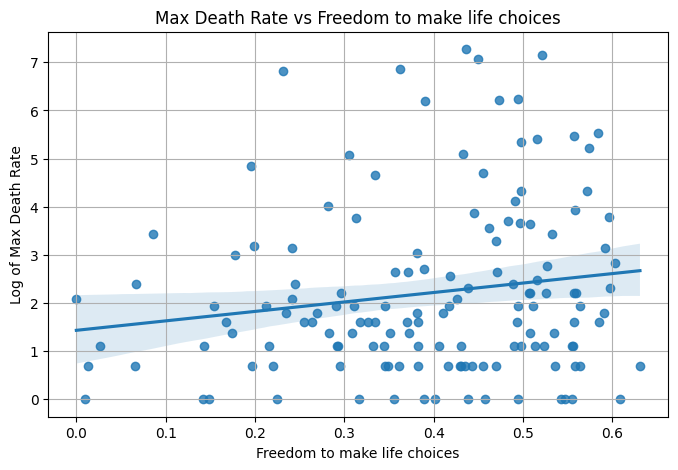

In [19]:
plt.figure(figsize=(8, 5))
sns.regplot(x=death_merged["Freedom to make life choices"], y=np.log1p(death_merged["max_death_rate"]))
plt.title("Max Death Rate vs Freedom to make life choices")
plt.xlabel("Freedom to make life choices")
plt.ylabel("Log of Max Death Rate")
plt.grid(True)
plt.show()
